# 3.2 Second-order responses

## 3.2.1 Second order Translational Mechanical system

Every differential relationship between power conjugate variables that is added to a system of equations  
adds another order to the system  
  
The first order translational mechanical system included one differential relationship; Newton's law  
recall  
![image1!](./images_s3/image_3_2_1.png)  
  
$$F_i+F_a-F_g=0$$  
where $F_i\equiv inertial\;force$, $F_a\equiv air\;drag$, and $F_g\equiv gravity$  
and  
  
$$m\frac{dv}{dt}+bv=F_g$$  
Rewritten in the frequency domain with zero initial conditions
  
$$smv(s)+bv(s)=F_g(s)$$

## 3.2.2 Hooke's law

Hooke's law is normally written as  
$$F=kx$$  
if we recast this equation using power conjugate variables, we get  
$$F(t)=k\int v(t)dt$$  
The integral of velocity over time is the position  
  
Finally, transforming to the frequency domain gives  
$$F(s)=k\frac{v(s)}{s}$$

## 3.2.3 Incorporating Hooke's law into the system

Assume that we attach a bungy cord to the ball as shown in the figure below  
Let's call the force, $F_s$ for "spring force", which will try to pull the ball up as the spring stretches

![image2!](./images_s3/image_3_2_2.png)  
  
The system's equation becomes  
  
$$F_i+F_a+F_s-F_g=0$$  
and  
  
$$m\frac{dv}{dt}+bv+k\int v(t)dt=F_g$$  
Rewriting in the frequency domain with zero initial conditions
  
$$smv(s)+bv(s)+k\frac{v(s)}{s}=F_g(s)$$

## 3.2.4 Transfer function

Now that we have the system equation in the frequency domain and calculus has become algebra,  
it's easy to write the transfer function  
  
$$(sm+b+\frac{k}{s})\;v(s)=F_g(s)$$  
multiply through by s and divide by m  
  
$$(s^2+\frac{b}{m}s+\frac{k}{m})\;v(s)=\frac{sF_g(s)}{m}$$  
write as a polynomial in s, over a polynomial in s  
  
$$H(s)=\frac{v(s)}{F_g(s)}=\frac{\frac{1}{m}s}{s^2+\frac{b}{m}s+\frac{k}{m}}$$  
  
That's the transfer function, and the graphical representation of the transfer function is  
![image3!](./images_s3/image_3_2_3.png)  
The transfer function is second order because the denominator is a second order polynomial  
The second order polynomial has two roots, or the system has two natural frequencies  

## 3.2.5 Example of a falling body attached to a bungy cord

Recall we did this same problem previously, with no bungy cord attached  
The force applied to the ball is due to gravity after you let go  
![image4!](./images_s3/image_3_2_4.png)  
  
In the time domain, this input force is $F_g(t)=9.81m\;u(t)$, where m is the mass of the ball  
  
To apply this force to the transfer function, transform it to the frequency domain, $F_g(s)=\frac{9.81m}{s}$  
  
Let's perform the calculation using the symbolic library and then substitute the numerical values

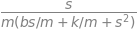

In [1]:
import sympy as sym
sym.init_printing() # enables pretty printing for formulas

# create symbols
t, s, b, m, k = sym.symbols('t s b m k')

# create the transfer function
H_s = (s/m)/(s**2+b/m*s+k/m)

# just type H_s for pretty printing
H_s

In [2]:
# define the input Force
Fg_t = 9.81*m*sym.Heaviside(t)
Fg_s = sym.laplace_transform(Fg_t, t, s, noconds=True)
Fg_s

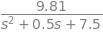

In [3]:
# form the product
v_s = H_s*Fg_s

# enter the constants - all units must be SI units
b_v = 0.1 # kg/s
m_v = 0.2 # kg
k_v = 1.5 # N/m (It takes 1.5N of force, about 1/3 pound to stretch the rubber band by 1m)

# substitute the values  
v_s_v = v_s.subs([(b, b_v), (m, m_v), (k, k_v)])
v_s_v

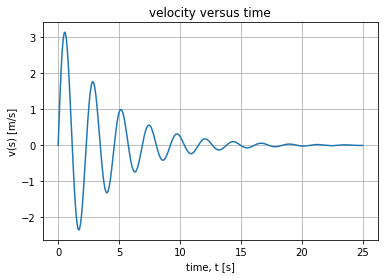

In [4]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# create the lti system
num, den = v_s_v.as_numer_denom()
num = np.fromiter(num.as_poly(s).all_coeffs(), dtype=float)
den = np.fromiter(den.as_poly(s).all_coeffs(), dtype=float)

v_s = sig.lti(num, den)

# create a time array
t = np.linspace(0, 25, 1000)

# use the impulse method to find the step response and plot it
t, v_t = v_s.impulse(T=t)
plt.plot(t, v_t)
plt.xlabel('time, t [s]')
plt.ylabel('v(s) [m/s]')
plt.title('velocity versus time')
plt.grid()

You can see from the result, that the velocity increases when the ball is dropped  
however, that causes the spring to stretch.  
As the spring stretches it starts to slow the ball down, eventually reaching zero velocity  
and then starts to pull the ball back up, reversing the sign of the velocity  
  
The ball bounces up and just like you would expect

## 3.2.6 The shape of the response tells you the natural frequencies

There it is, the shape we saw associated with complex frequencies  
You should guess the poles of the system are complex poles of the form $s=\alpha\pm j\omega$  
where $\alpha<0$, because it is decaying  
  
The rule of thumb is about five time constants for a real exponential to decay to steady state,  
so I would estimate the time constant to be about 5 [seconds] or $\alpha\approx-\frac{1}{5}=-0.2$ [Np/s]  
  
Each cycle of the sin/cos wave is $2\pi$ [rad], and I estimate about $2\frac{1}{4}$ cycles in 5 [seconds]  
so $\omega\approx\frac{2.25\;cycles\;\cdot\;2\pi\;\frac{rad}{cycle}}{5\;s}=2.8\;\frac{rad}{s}$  
  
giving us an estimated frequency of $s\approx-0.2\pm2.8\;[\frac{1}{s}]$  
  
Let's do the math and compare!

In [5]:
# the poles of the system are an attribute of the lti object
print(v_s.poles)

[-0.25+2.72717803j -0.25-2.72717803j]


Hey, not a bad guess!

## 3.2.7 The natural reponse is two exponentials added together

If we want to find the equation for the time dependent response, we can find the residues  
remember,  
  
$$v(s)=\frac{9.81}{s^2+0.5s+7.5}=\frac{R_0}{s+0.25-j2.72}+\frac{R_1}{s+0.25+j2.72}$$  
where $R_0$ and $R_1$ can be found by partial fraction expansion  
don't worry about the complex numbers, the process is exactly the same as if they were real numbers  
  
We will use python to the find the residues  

In [6]:
# we already defined a "k" term for the spring constant
r, p, k0 = sig.residue(num, den)
print('residues =', r)
print('poles =', p)
print('make sure k is empty', k0)

residues = [0.-1.79856245j 0.+1.79856245j]
poles = [-0.25+2.72717803j -0.25-2.72717803j]
make sure k is empty []


so the equation for the velocity as a function of time is  
  
$v(t)=-1.8je^{(-0.25+j2.72)t}+1.8je^{(-0.25-j2.72)t}$ [m/s]  
  
Notice the phasor has a magnitude of 3.6, but is purely imaginary, pointing down on the complex plane  
thus, this amount of phase shift makes the wave a true sin wave

## 3.2.8 Plot the position as a function of time

Because the function we found, $v(s)$, did not have initial conditions,  
we can integrate by dividing by s  
  
The integral of velocity is the position, $x(s)=\frac{v(s)}{s}$

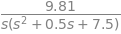

In [7]:
# integrate the symbolic function for velocity
x_s_v = v_s_v/s
x_s_v

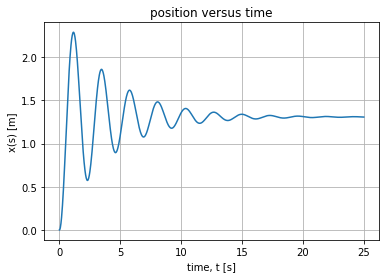

In [8]:
# create the lti system
num, den = x_s_v.as_numer_denom()
num = np.fromiter(num.as_poly(s).all_coeffs(), dtype=float)
den = np.fromiter(den.as_poly(s).all_coeffs(), dtype=float)

x_s = sig.lti(num, den)

# use the impulse method to find the step response and plot it
t, x_t = x_s.impulse(T=t)
plt.plot(t, x_t)
plt.xlabel('time, t [s]')
plt.ylabel('x(s) [m]')
plt.title('position versus time')
plt.grid()

## 3.2.9 Use the phasor method to find the steady state DC value

Position versus time looks exaclty as expected, you let go of the ball at a position of $x=0$  
and the ball bounces up and down  
  
When it finally settles, it rests at position that has stretched the bungy cord  
In this example, the bungy cord is stretched by just over a meter  
  
In fact, we can use the phasor method to find the DC steady state value for how much the bungy cord is stretched  
start with the transfer function
![image5!](./images_s3/image_3_2_5.png)  
  
write the phasor method  
  
$$phasor\;x(s)=\frac{\frac{1}{m}}{s^2+\frac{b}{m}s+\frac{k}{m}}\cdot phasor\;input$$  
and find $x$ at the frequency $s=0$  
  
The input is a step function is equal to $9.81m\;u(t)$, but has a phasor magnitude of $9.81m$ at $s=0$  
so  
  
$$phasor\;x(0)=\frac{\frac{1}{m}}{0^2+\frac{b}{m}0+\frac{k}{m}}\cdot9.81m$$  
which simplifies to $\frac{9.81m}{k}$, exactly where the force of gravity is balanced by the force of the spring  
  
For our example, $x(0)=\frac{9.81\cdot0.2}{1.5}=1.3$ [m]

## 3.2.10 The "ringing" response

When the poles are complex, the signal will "ring"  
It is called "ringing" because it is the same signal a bell makes when you strike one with a hammer  
In the case of ringing a bell, you are creating an impulse response of the system, where the bell is the system  
  
Of course, the bell rings with a specific frequency,  
the $j\omega$ part of the natural frequency of the bell, $s=\alpha\pm j\omega$, produces the bell's tone  
  
The bell's volume gets quieter and quieter, as it rings longer and longer, and finally stops making sound  
This is due to the $\alpha$ part of the natural frequency of the bell  
We know $\alpha$ must be negative because the sound decays to zero, rather than growing louder and louder  
  
![image6!](./images_s3/image_3_2_6.png)  

## 3.2.11 "Damping" associated with the response of a system

A high quality bell rings for a long time, because it has poles that are very close to the imaginary axis  
Friction, or "damping", causes a system response to decay  
  
Poles that land on the imaginary axis describe sin/cos waves that never decay, $\alpha=0$  
If there is no frcition, or no damping, the sytem response will never decay  
  
The transfer function for our second order system is  
$$H(s)=\frac{v(s)}{F_g(s)}=\frac{\frac{1}{m}s}{s^2+\frac{b}{m}s+\frac{k}{m}}$$  
  
The system is "damped" because of friction  
For translational mechanical systems, friction is modeled as Stokes' drag, $F=bv$  
  
For all different type of systems, the direct relation between power conjugate variables produces the damping  
For electrical systems, the damping term is the resistance, given by Ohm's law, $V=IR$

For all second order systems, damping appears in s-term of the denominator of the transfer function  
![image7!](./images_s3/image_3_2_7.png)  
  
The natural frequencies of the system, or the poles, are found from the roots of the denominator  
In general, a second order system will have roots found from the quadratic equation  
  
rewrting the denominator in the general form of the quadratic equation and finding the roots  
(the "b" in the quadratic equation is different than the "b" in Stokes' drag, don't confuse them)  
  
$$as^2+bs+c=0$$  
gives us  
$$s_{1,2}=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$  
$s_{1,2}$ are the natural frequencies of a second order system

## 3.2.12 No damping, underdamped, critically damped, and overdamped

The roots found from the quadratic equation can be imaginary, complex, real and equal, or real and different  
  
1. No damping  
      $-b\pm\sqrt{b^2-4ac}=\pm\sqrt{-4ac}$ because $b=0$, roots are purely imaginary  
2. underdamped  
    $\sqrt{b^2-4ac}<0$, roots are complex numbers and complex conjugates  
3. crtically damped  
    $\sqrt{b^2-4ac}=0$, roots are real and equal  
4. overdamped  
    $\sqrt{b^2-4ac}>0$, roots are real and different  
  
For the critically damped case $\sqrt{b^2-4ac}=0\Rightarrow b^2-4ac=0\Rightarrow b^2=4ac\Rightarrow b=2\sqrt{ac}$,  
  
For our example system, $a=1$, $b=\frac{b_{Stokes}}{m}$ and $c=\frac{k}{m}$  
or  
$\frac{b_{Stokes}}{m}=2\sqrt{\frac{k}{m}}\Rightarrow 2\sqrt{k\cdot m}$  

## 3.2.13 The magnitude of the natural frequency

The poles, or natural frequencies, of the system are $s_{1,2}$  
When the poles are plotted on the complex s-plane, they form a vector, or phasor, with real and imaginary parts  
  
The distance from the origin to the pole is the magnitude of the natural frequency, often called $\omega_n$  
It can be found with the Pythagorean theorem $\omega_n=\sqrt{s_{real}^2+s_{imaginary}^2}$  
  
For a second order system, if only the damping coefficent is changed,  
the magnitude of the natural frequencies will not change  
  
The code cell below varies the Stokes' drag coefficent  
and plots the location of the poles on the complex s-plane  

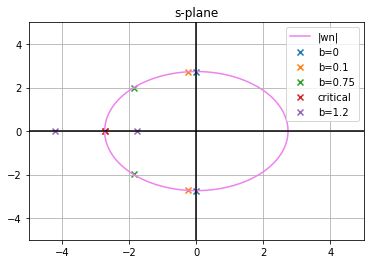

In [9]:
# enter the constants - all units must be SI units
m_v = 0.2 # kg
k_v = 1.5 # N/m (It takes 1.5N of force, about 1/3 pound to stretch the rubber band by 1m)

# vary the damping term for five different values of b
# 1. no damping, 2. underdamped close to the imaginary axis, 3. underdamped, 4. critically damped, 5. overdamped
for b_v in [0.0, 0.1, 0.75, 2*np.sqrt(k_v*m_v), 1.2]:
    
    # form the product
    v_s = H_s*Fg_s
    
    # substitute the values  
    v_s_v = v_s.subs([(b, b_v), (m, m_v), (k, k_v)])
    
    # create the lti system
    num, den = v_s_v.as_numer_denom()
    num = np.fromiter(num.as_poly(s).all_coeffs(), dtype=float)
    den = np.fromiter(den.as_poly(s).all_coeffs(), dtype=float)
    
    v_s = sig.lti(num, den)

    # plot the poles on the complex plane
    plt.scatter(v_s.poles.real, v_s.poles.imag, marker='x')

# plot a circle of radius sqrt(k/m) (magnitude of the natural frequency)
theta = np.linspace(0, 2*np.pi, 100)
circ = np.sqrt(k_v/m_v)*np.exp(1j*theta)
plt.plot(circ.real, circ.imag, color = 'violet')

plt.legend(['|wn|', 'b=0', 'b=0.1', 'b=0.75', 'critical', 'b=1.2'], loc='upper right')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('s-plane')
plt.grid()

## 3.2.14 The response of no damping, underdamped, critically damped, and overdamped

When you strike a bell with a hammer, it rings  
however, if you dampen the sound by placing your finger on the bell you get a thud  
  
the "ringing" and the "thud" are impulse responses of the system  
  
In our example, we found the velocity due to a step reponse of gravity  
when the ball was dropped in air  
  
For the translational mechanical system, the different damping regions  
could be created experimentally by changing the medium that causes drag  
  
For example  
  
1. no damping, drop the ball in a vacuum with a perfect frictionless spring
2. underdamped, drop the ball in air with a real bungy cord  
3. underdamped, drop the ball in air with an old warn out bungy cord
4. critically damped, drop the ball underwater in a swimming pool  
5. overdamped, drop the ball in a big jar of honey, like Winnie the pooh
  
The code cell below, plots the responses due to the five cases of varying Stokes' drag  
the responses correspond to the poles shown in the s-plane plot above  

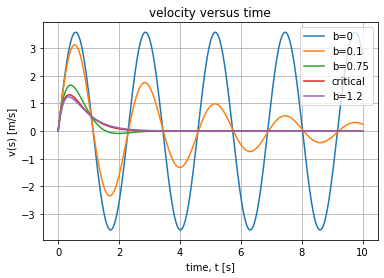

In [10]:
# create a time array
t = np.linspace(0, 10, 1000)

# enter the constants - all units must be SI units
m_v = 0.2 # kg
k_v = 1.5 # N/m (It takes 1.5N of force, about 1/3 pound to stretch the rubber band by 1m)

# vary the damping term for five different values of b
# 1. no damping, 2. underdamped close to the imaginary axis, 3. underdamped, 4. critically damped, 5. overdamped
for b_v in [0.0, 0.1, 0.75, 2*np.sqrt(k_v*m_v), 1.2]:
    
    # form the product
    v_s = H_s*Fg_s
    
    # substitute the values  
    v_s_v = v_s.subs([(b, b_v), (m, m_v), (k, k_v)])
    
    # create the lti system
    num, den = v_s_v.as_numer_denom()
    num = np.fromiter(num.as_poly(s).all_coeffs(), dtype=float)
    den = np.fromiter(den.as_poly(s).all_coeffs(), dtype=float)
    
    v_s = sig.lti(num, den)
    
    # use the impulse method to find the step response and plot it
    t, v_t = v_s.impulse(T=t)

    # plot the response
    plt.plot(t, v_t)

plt.legend(['b=0', 'b=0.1', 'b=0.75', 'critical', 'b=1.2'], loc='upper right')
plt.xlabel('time, t [s]')
plt.ylabel('v(s) [m/s]')
plt.title('velocity versus time')
plt.grid()